In [1]:
#importing the libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import pandas as pd
%matplotlib inline

In [2]:
#importing the dataset
dataset=pd.read_csv("datasets_19_420_Iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#drop Id column
dataset=dataset.drop("Id", axis=1)
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#summary of the dataset
#counting rows and columns

dataset.shape

(150, 5)

In [5]:
#more info

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB
None


In [6]:
#descriptions/other info/5 point summary

print(dataset.describe())

       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


In [7]:
#class distribution
print(dataset.groupby("Species").size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


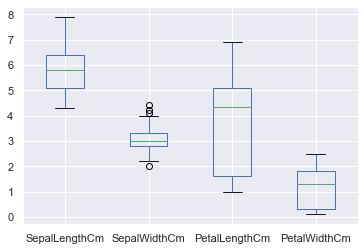

In [8]:
#visualisations
#box and whiskers plot

dataset.plot(kind="box", sharex="False", sharey="False")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x085D2D70>,
      dtype=object)

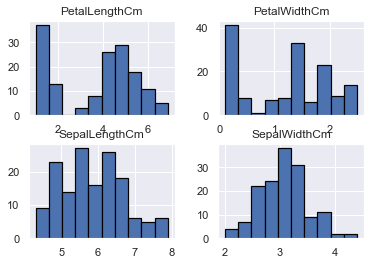

In [9]:
#histograms
dataset.hist(edgecolor="black", linewidth="1.2")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x086F0F70>,
      dtype=object)

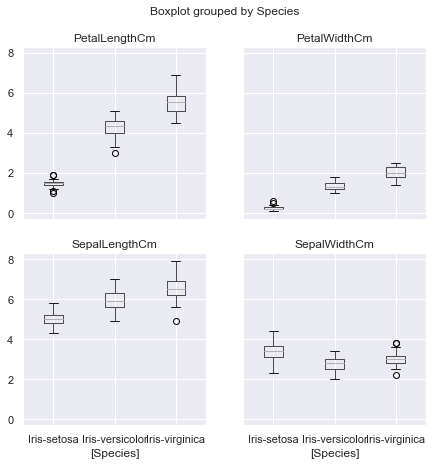

In [10]:
#boxplot grouped by species
dataset.boxplot(by="Species", figsize=(7,7))

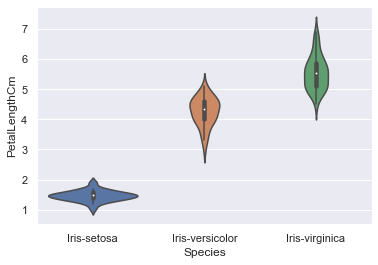

In [11]:
#seaborn violin plots on petal length for each species
sns.violinplot(data=dataset,x="Species", y="PetalLengthCm")

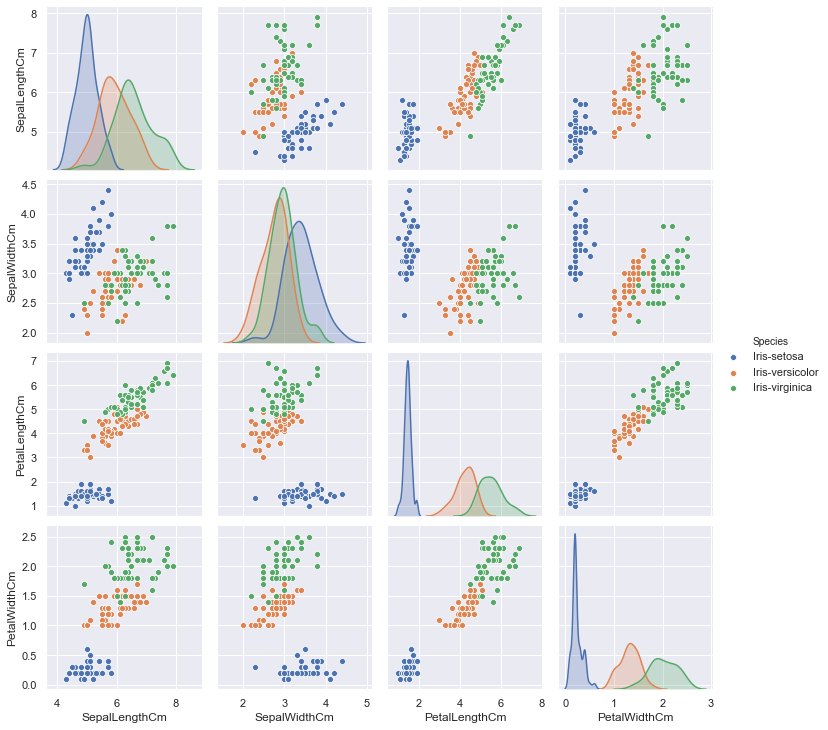

In [12]:
#using seaborn pairplot to see the bivariate relation between each pair of features

sns.pairplot(dataset, hue="Species", diag_kind="kde")

#From the plot, we can see that the species setosa is separataed from the other two across all feature combinations

In [13]:
#applying different classification models
#importing metrics for evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [14]:
#separate dependent and independent variables, X is independent, y is dependent
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [16]:
#splitting dataset into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

y_pred=classifier.predict(X_test)

#summary of the predictions made by the classifier
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test, y_pred))

#accuracy score
from sklearn.metrics import accuracy_score
print ("accuarcy is ", accuracy_score(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
accuarcy is  0.9666666666666667


C:\Users\Marlon\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Marlon\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [21]:
#Naive_Bayes
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)


#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy is ", accuracy_score(y_pred, y_test))



                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 13  0]
 [ 0  1  5]]
Accuracy is  0.9666666666666667


In [22]:
#Support vector machine's

from sklearn.svm import SVC
classifier=SVC()
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

#summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#accuracy score
print("accuracy is", accuracy_score(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is 1.0


C:\Users\Marlon\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [23]:
#k-nearest neighbors

from sklearn.neighbors import KNeighborsClassifier

classifier=KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

#summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#accuracy
from sklearn.metrics import accuracy_score
print("accuracy is ", accuracy_score(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
accuracy is  1.0


In [24]:
#decision Tree

from sklearn.tree import DecisionTreeClassifier

classifier=DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

#summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy is ", accuracy_score(y_pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         6

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]
Accuracy is  1.0
